# <center>Neuronas adaptativas lineales (Adaline)</center>
Adaline fue publicado unos años después del [algoritmo del perceptrón](https://github.com/mondeja/fullstack/blob/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/002-perceptron.ipynb), por [Bernard Widrow](https://en.wikipedia.org/wiki/Bernard_Widrow) y su estudiante de tesis doctoral Tedd Hoff en 1960. El algoritmo Adaline es particularmente interesante porque ilustra el concepto clave de definir y minimizar el coste de las funciones, lo cual sentará las bases para entender algoritmos de machine learning más avanzados para clasificación, tal como la regresión logística o las máquinas de vectores de soporte.

La diferencia entre la regla Adaline y el perceptrón es que los pesos son actualizados basándose en una función de activación $\phi(z)$ lineal, no en una función de salto unitaria como en el perceptrón. Mediante este algoritmo calculamos el error del modelo para actualizar los pesos, como podemos ver en la siguiente imagen:

![adaline estructura](images/adaline.jpg)

### Minimizar los costes de las funciones con pendientes de gradientes
Uno de los ingredientes clave del aprendizaje supervisado es definir una *función objetivo* que es optimizada durante el proceso de aprendizaje. Esta función objetivo es a menudo una *función de coste* que queremos minimizar. En el caso de Adaline, podemos definir el coste de función $J$ para enseñar a los pesos la **suma de errores cuadrados** (SSE, Sum of Squared Errors) entre el resultado calculado y la etiqueta de clase verdadera. 

<center>$J(w) = {1 \over 2} \sum_i (y^{(i)} - \phi (z^{(i)}) )^2$</center>

El termino ${1 \over 2}$ ha sido añadido por conveniencia, este nos hace más fácil derivar el gradiente. La ventaja principal de esta función de activación lineal es, en contraste con la función de activación unitaria, que el coste de función se vuelve diferenciable. Otra ventaja de esta función es que es convexa, así, podemos usar un algoritmo de optimización llamado **descenso de gradiente** (*gradient descent*) para encontrar los pesos que minimizan nuestro coste de función al clasificar las muestras en el conjunto de datos Iris.

Como se ilustra en la siguiente figura, podemos describir el principio detrás del algoritmo de descenso de gradiente como *subir una colina* hasta que alcanzamos un coste local o global mínimo. En cada iteración nos alejamos un paso del gradiente donde el tamaño del paso está determinado por el valor de la tasa de aprendizaje y la pendiente del gradiente: 

![Descenso de gradiente](images/gradient_descent.jpg)

## Implementación de una neurona adaptativa lineal

In [2]:
import numpy as np

class AdalineGD:
    """Clasificador de neurona adaptativa lineal
    
    Args:
        eta (float): Tasa de aprendizaje (entre 0.0 y 1.0)
        n_iter (int): Número de iteraciones sobre el conjunto 
            de datos de entrenamiento
            
    Attrs:
        w_ (array 1d): Pesos después de ajustar.
        errors_ (list): Número de errores en cada iteración
    """
    def __init__(self, eta=.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Ajusta los datos de entrenamiento
        
        Args:
            X (array): Vectores de entrenamiento, una matriz
                donde las filas son las muestras y las columnas
                las características.
            y (array): Valores objetivos (verdaderos)
        
        Returns: self (object)
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Calcula la activación lineal"""
        return self.net_input(X)
    
    def predict(self, X):
        """Retorna la etiqueta de clase después del salto unitario"""
        return np.where(self.activation(X) >= 0, 1, -1)

En lugar de evaluar cada muestra de entrenamiento de forma individual, como en el perceptrón, calculamos el gradiente basándonos en el conjunto completo de datos vía `self.eta * errors.sum()`para los pesos 0 y vía `self.eta * X.T.dot(errors)` para los pesos 1 a $m$ donde `X.T.dot(errors)` es un multiplicación vector-matriz entre la matriz de características y el vector de error. Similar a la amplementación previa del perceptrón, recogemos los valores de coste en una lista `self.cost_`para comprobar si el algoritmo converge después del entrenamiento.

En la práctica, a menudo se requiere de experimentación para encontrar una buena tasa de aprendizaje $\eta$ para una convergencia óptima. Vamos a elegir tasas de entrenamiento $\eta = 0.1$ y $\eta = 0.0001$ para empezar y dibujar los costes de funciones contra el número de iteraciones para ver como aprende la implementación Adaline de los datos de entrenamiento, aunque antes vamos a cargar el dataset Iris, como hicimos en [el notebook del perceptrón](https://github.com/mondeja/fullstack/tree/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/002-perceptron.ipynb):

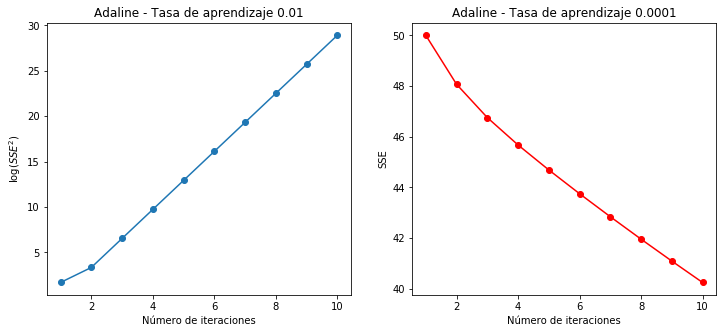

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
y = df.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)
X = df.iloc[:100, [0, 2]].values

# ======================================================

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primera implementación
ada1 = AdalineGD(n_iter=10, eta=.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel("Número de iteraciones")
ax[0].set_ylabel("log($SSE^2$)")
ax[0].set_title("Adaline - Tasa de aprendizaje 0.01")

# Segunda implementación
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker="o", c="red")
ax[1].set_xlabel("Número de iteraciones")
ax[1].set_ylabel("SSE")
ax[1].set_title("Adaline - Tasa de aprendizaje 0.0001")

plt.show()

Podemos ver en las dos gráficas dos tipos de problemas. La de la izquierda muestra lo que podría ocurrir si elegimos una tasa de aprendizaje demasiado grande, en lugar de minimizar el coste de función, el error se vuelve mayor en cada iteración, debido a que hemos excedido el mínimo global.

Aunque podemos ver que el coste decrece cuando miramos a la gráfica de la derecha, la tasa de aprendizaje elegida es tan pequeña ($\eta = 0.0001$) que el algoritmo necesita demasiadas iteraciones para converger (prueba con $0.0005$). La siguiente figura ilustra como cambiamos el valor de un peso particular para minimizar el coste de la función J (izquierda) y lo que ocurre si elegimos una tasa de aprendizaje demasiado alta, excedemos el mínimo global (derecha).

![overshooting](images/overshooting.jpg)

Muchos de los algoritmos de machine learning necesitan algún tipo de escalado en las características para que obtengan un rendimiento óptimo. El descenso de gradiente es uno de los algoritmos que se benefician del escalado de características. Aquí usaremos un método de de escalado llamado *estandarización*, el cual da a los datos la propiedad de una distribución normal. La media de cada característica es centrada en el valor 0 y la columna de la característica tiene una desviación estándar de 1.